<br>

# An investigation into the numpy.random package


<ins>[NUMPY OFFICAL DOCUMENTATION](https://numpy.org/doc/stable/reference/random/generator.html)<ins>

# <ins>WHAT IS NUMPY<ins>

"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more."[[1]](https://numpy.org/doc/1.19/user/whatisnumpy.html)  
That is the official explaination for Numpy from the offial documentation V1.19. This a bit wordy and frankly frightening when first read by a novice to programming who has not done a lot of mathamatics in the last decade. So I found it easier to first try to gleen some insight into the Numpy libary by simply googling 'What is Numpy?' and using a resource like W3Schools[[2]](https://www.w3schools.com/python/numpy/numpy_intro.asp) or Real Python[[3]](https://realpython.com/tutorials/numpy/) to give me a less imtimidating description (even if it is a little less robust) of numpy.

##### <ins>Arrays<ins>
However before I get into Numpy I would first like to define an array in python, as arrays are the foudation of how numpy is able to manipulate data.
In simple terms an array is a list of the same data type in python. Once that was clear to me I found the Real Python introduction the best to begin to wrap my head around numpy, its functionality and uses. "NumPy is a third-party Python library that provides support for large multidimensional arrays and matrices along with a collection of mathematical functions to operate on these elements."[[4]](https://realpython.com/tutorials/numpy/) In my own words, Numpy gives you tools to manipulate lists of data, with emphasis on mathematical functionality. 

##### <ins>Popular uses for Numpy<ins>
The numpy.random package has a number typical applications. The most popular include:[[6]](https://github.com/andkoc001/fun-with-numpy-random/blob/master/exploring-random-numpy.ipynb)

 - random number generation
 - choice from a list
 - creation of dummy data (e.g. for demonstration of some other functionalities)
 - simulation of statistical distribution
 - hypothesis testing (assessment of how reasonable the observed data is, assuming a hypothesis is true)
 - shuffling existing data (permutation - random reordering of entries in an array)
 - simulation of uncertainty
 - simulation of noise.
 
 
 


### <ins>A Brife History of Numpy<ins>
Although online much of the credit of the creation of Numpy goes to Travis Oliphant in 2006[[7]](https://en.wikipedia.org/wiki/Travis_Oliphant), much of the actual code was written by a group of graduate students who "upended the already well-established ecosystem of research software—backed by millions in funding and many hundreds of highly qualified engineers"[[8]](https://numpy.org/history/). It is now relied on by scientists, engineers, data analysts and many other professions around the world. 

### <ins>Installing numpy<ins>
Numpy is a libary in the python package so if you have downloaded some version of python (I would reccomend anaconda) then simply import it in to your code using:

```import numpy as np```

np is the standard abbreviation for numpy in Python


**Here is a link to the offical installation documentation: https://numpy.org/install/**

### <ins>Importing numpy.random library and version check<ins>

 Below are the libaries and sub-libaries I used during the production of this notebook.  
 Not all were used in the finished product as I somtimes found simpler ways to do what I was trying after further reading.  

In [1]:
# NumPy package
import numpy as np 

# For Random number Generation
import numpy.random as r

# To read in data
import pandas as pd 

# Plotting engine
import matplotlib.pyplot as plt 

# For distributions
import scipy.stats as stats 

# For nice plots
import seaborn as sns 

# For possion distribution
from scipy.stats import poisson as pois 


In [2]:
# NumPy version check - in case the most up to date documentation has changed
np.version.version 

'1.20.1'

### <ins>Simple random data<ins>


Simple Random Data is essentially used to generate random numbers. Within the Simple random data there are a number of different functions (or routines) that can be used to generate random numbers and each function returns results from different distributions, these include uniform distribution, standard normal distribution and continuous uniform distribution. The user can use the function which best serves them.[[9]](https://github.com/johndunne2019/numpy.random/blob/master/numpy-random.ipynb)

 Simple random data is a collection of methods used for two categories of application:  
1) generating of a pseudo random number from a range
2) random selection of an object from a list

In the first category, there are several methods, producing different outputs. For instance, the np.random.random() generates float numbers from half-open range [0,1), whereas np.random.randint() generates integer numbers from a range.

The second category, offers the functionality of randomly picking of objects from an existing list.

##### <ins>Random Sampling is really pseudo random!!!!<ins>
It is important to mention here that the routines return numbers that are not truly "random". The numbers are generated using the system's current time down to the millisecond, and could be repeated if the routine is called under the same conditions. So the numbers that are generated are referred as to pseudo random. This makes these "random" number generators unsuitable for cryptogrophy and encryption as they would be a security risk.[[10]](https://realpython.com/python-random/)[[11]](https://docs.python.org/3/library/random.html)


Below is a full list of the functions within Simple Random Data taken from: https://numpy.org/doc/stable/reference/random/legacy.html

 - **rand**(d0, d1, …, dn) - Random values in a given shape.
 - **randn**(d0, d1, …, dn) - Return a sample (or samples) from the “standard normal” distribution.
 - **randint**(low[, high, size, dtype]) - Return random integers from low (inclusive) to high (exclusive).
 - **random_integers**(low[, high, size]) - Random integers of type np.int_ between low and high, inclusive.
 - **random_sample**([size]) - Return random floats in the half-open interval [0.0, 1.0).
 - **choice**(a[, size, replace, p]) - Generates a random sample from a given 1-D array
 - **bytes**(length) - Return random bytes.
 
 I have used some of them below to give an example of how they work.

# <ins>Numpy Random Tutorial<ins>

**NB** - Remember I have imported the random module as 'r'

I found this brife video helpful to give a practical understanding of Simple Random Data generation: [Youtube Video](https://www.youtube.com/watch?v=Eu-GfO9Lj_E)    

Here are some of the subroutines available when generating Simple Random data.

<br>

##### <ins>numpy.random.rand<ins>

Explaination: Random values in a given shape. This method returns random float number(s) from uniform distribution on [0,1), i.e. from 0 (inclusive) to 1 (exclusive) 


Offical Documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

In [3]:
# Generating Random Data - floating numbers between 0 and 1
# 1 full array containing 2 other arrays, each with 10 arrays containing 3 elements in each of those arrays 
r.rand(2,10, 3)


array([[[0.59693245, 0.5719463 , 0.04852388],
        [0.74562092, 0.7834878 , 0.00918071],
        [0.28364261, 0.33558953, 0.74230544],
        [0.72131666, 0.50631582, 0.8689878 ],
        [0.33934604, 0.15685397, 0.54128664],
        [0.80030931, 0.04468864, 0.31689122],
        [0.09731621, 0.37896867, 0.88242633],
        [0.00911487, 0.81885292, 0.20470485],
        [0.31451885, 0.9887551 , 0.70575967],
        [0.49876238, 0.19636409, 0.93599987]],

       [[0.06628638, 0.8995746 , 0.28720496],
        [0.75672092, 0.32742002, 0.48386736],
        [0.58030498, 0.66589394, 0.25272591],
        [0.76715078, 0.20852794, 0.64788566],
        [0.52984207, 0.8931809 , 0.43103334],
        [0.97291599, 0.09744503, 0.46704668],
        [0.07900584, 0.96411231, 0.6041163 ],
        [0.15667318, 0.86087872, 0.35548352],
        [0.28882132, 0.39565724, 0.43957777],
        [0.47774261, 0.33320165, 0.22687654]]])

Something interesting I did notice was if you multiply the 3 values passed from the argument - that will return the number of elements you have requested.  
```r.rand(2,10,3)``` (2 x 10 x 3 = 60) - I tried this multiple ways and always seemed to get the same number of random values returned, but the shape of my data was different.  
It was a good way for me to understand how to "shape" the data in a certain way if required.


**Visualisation of rand using pyplot (uniform distribution)**

These are the numbers gernerated by the rand function: [[1.47622927e-02 7.38751605e-01 1.88376908e-04 8.88279897e-01
  2.64011255e-01 3.02057521e-01 8.35413511e-01 3.34924222e-01
  2.69382305e-02 4.18958040e-01 7.87814170e-02 1.38143787e-01
  2.35834592e-01 6.92086426e-01 2.74064638e-01 1.29570312e-01
  8.23637504e-01 5.92369193e-01 1.45564052e-01 3.39491523e-01
  2.01349028e-01 8.11204138e-01 1.27303404e-01 5.92631015e-01
  1.51991475e-01 2.01735247e-01 9.66222528e-01 3.76545520e-01
  9.24677890e-01 4.45189979e-01 6.93270122e-01 1.92151286e-01
  8.31732011e-01 4.21291980e-01 8.37239939e-01 3.42696171e-01
  7.97969418e-02 6.22684707e-01 8.61840117e-01 4.12808877e-01]
 [2.78663310e-01 5.98125375e-01 6.68308926e-01 5.56687449e-01
  1.05577852e-02 3.97427423e-01 2.80153830e-01 6.34641086e-02
  6.01418947e-01 5.23843894e-01 9.08562534e-01 3.34929290e-02
  8.48172604e-01 1.39895340e-01 3.26737294e-01 1.78582882e-01
  3.45830695e-01 8.51907022e-01 9.64246725e-02 4.69140415e-01
  5.11220456e-

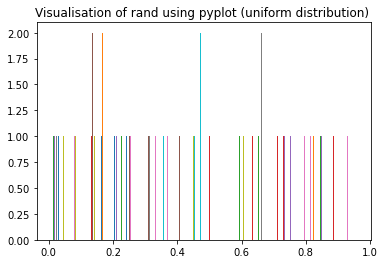

In [4]:
# Create a variable
rand = r.rand(2,40)
print('These are the numbers gernerated by the rand function:',rand)

# Generate histogram using variable
plt.hist(rand)

# Title of plot
plt.title('Visualisation of rand using pyplot (uniform distribution) ')

# Show plot
plt.show()

<br>

##### <ins>numpy.random.randn<ins>

Explaination: Return a sample (or samples) from the “standard normal” distribution.

"If positive int_like arguments are provided, randn generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1. A single float randomly sampled from the distribution is returned if no argument is provided."

Offical Documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [5]:
# randn is used to generate an array with 2 rows of data
randn = np.random.randn(2)
print("The first argument decides how many columns of data to be generated:")
print(randn)

# randn generated an array with 2 rows and 2 columns
randn2 = np.random.randn(2, 2)
print("The second argument decides how many rows of data to be generated:")
print(randn2)

# 3rd argument grnerates a the number of arrays that should be created from the first two arguments
randn3 = np.random.randn(2, 4, 2)
print("The third argument decides how many arrays will be created:")
print(randn3)

The first argument decides how many columns of data to be generated:
[-0.21944964  0.84288828]
The second argument decides how many rows of data to be generated:
[[ 1.01446263 -0.27144347]
 [-0.05355256  0.38495625]]
The third argument decides how many arrays will be created:
[[[ 0.27216582 -0.62069509]
  [-0.22880412  0.0097348 ]
  [ 1.12317394  0.19503387]
  [ 0.41232788 -0.59083066]]

 [[-0.40388787 -1.11481265]
  [-1.4851389  -1.25199997]
  [ 0.80281012 -0.05784267]
  [-1.77639043  0.41725902]]]


<br>

**Visualisation of randn using pyplot (normal distribution)**

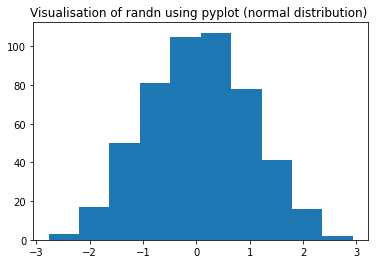

In [20]:
randn_values = r.randn(500)
# I have generated an array with 500 values using randn
plt.hist(randn_values)
plt.title('Visualisation of randn using pyplot (normal distribution) ')
plt.show()
# I have used matplotlib.pyplot to create a histogram of the array generated by randn
# There is a cluster of values around 0 (normal distribution)
# We can see now visually randn has returned random values with mean 0 and standard deviation of 1 

There is a function that I found [here](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/) called 'go' in the pyplot libary that sometimes gives a different "view" of the data - even though it is the same data as above (if you have run the notebook in sequence) in "randn_values".  
We can see the concentration of values between -3 and 3 with most values remaining around the mean of 0.  
Some may find this easier to understand - I personally like the histogram.

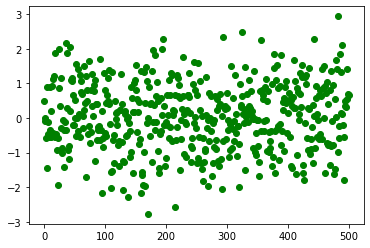

In [22]:
# generate scatter plot using "randn_values" and GO function from pyplot
plt.plot(randn_values, 'go')

<br>

##### <ins>numpy.random.randint<ins>

Explaination: Return random integers from low (inclusive) to high (exclusive).

Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).  The size parameter tells NumPy how many observations are to be generated, and can be organised in a multi-dimensional array.

Offical Documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

In [28]:
# Return an integer from 0 (inclusive) to 10 (exclusive)
r.randint(10)

8

In [29]:
# Return an integer from 10 (inclusive) to 100 (exclusive)
r.randint(10, 100)

57

In [30]:
# Return an integer from 10 (inclusive) to 100 (exclusive)
# with 1 big array with all 50 numbers or 5 "rows" of arrays of 10 numbers each
r.randint(10, 100, size = (5,10))

array([[34, 14, 31, 46, 10, 55, 92, 90, 80, 33],
       [39, 69, 67, 52, 86, 71, 30, 89, 71, 57],
       [93, 72, 38, 21, 27, 42, 41, 12, 33, 30],
       [45, 75, 45, 11, 62, 93, 57, 81, 54, 68],
       [90, 59, 24, 99, 66, 21, 11, 27, 18, 35]])

<br>

##### <ins>numpy.random.Generator.choice<ins>

Explaination: Generates a random sample from a given array

The random.choice method returns objects, which does not necessarily have to be numbers, from an existing list or array. It is possible for the objects to be selected more than once.

Offical Documentation:https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

In [24]:

# Create an array
list = ['MAZDA', 'FORD', 'VOLKSWAGEN', 'FERRARI', 'TESLA']

# random selection of objects from the list and indices 0 or 1, arranged into 4x1 array; some results may not appear or may appear more than once
np.random.choice(list[:2], size=[4,1]) 

array([['MAZDA'],
       ['FORD'],
       ['FORD'],
       ['FORD']], dtype='<U5')

##### Assigning Probability
It is also possible to assign a probability for each option.  
**NB: Sum of p has to come to 1**

In [25]:

# In this case FERRARI has a far higher probability of being returned - especially as the size argument increases 
np.random.choice(list, p=[0.1, 0.1, 0.1, 0.6, 0.1], size=20)

# If you cant tell I would like a Ferrari

array(['FERRARI', 'MAZDA', 'FORD', 'FERRARI', 'MAZDA', 'FORD', 'FERRARI',
       'FERRARI', 'FERRARI', 'FERRARI', 'FERRARI', 'FERRARI', 'FERRARI',
       'MAZDA', 'FERRARI', 'FERRARI', 'FERRARI', 'FERRARI', 'FERRARI',
       'TESLA'], dtype='<U10')

<br>

##### <ins>numpy.random.RandomState.bytes<ins>
    
Explaination: Return random bytes - it takes only one argument which is the number of bytes the user wants returned.

"Bytes literals are always prefixed with 'b' or 'B'; they produce an instance of the bytes type instead of the str type. They may only contain ASCII characters; bytes with a numeric value of 128 or greater must be expressed with escapes." https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals
This method may be used for a password generator (although it is still a pseudo random value).    

To be honest the random.bytes is a little hard to wrap your head around as most of the articles and videos focus on cryptograpy and from my reading it seems that it should only be used in testing and not in for real life encrypton - there are other libaries that seem to come much more highly reccomended for this.  
    
For Example:os.urandom() method is used to generate a string of size random bytes suitable for cryptographic use or we can say this method generates a string containing random characters. https://www.geeksforgeeks.org/python-os-urandom-method/
    
Offical Documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.bytes.html#numpy.random.RandomState.bytes

In [26]:
# The parameter passed to the method is the length of the returned string. For example:
# generate a random 10-long string of byte literals
np.random.bytes(10) 

b'\xb3\x8a?\x7f\xfeO\xda\x176&'

<br>

##### <ins>numpy.random.Generator.integers - and a simple plot<ins>
    
This is really a replacement for randint - although randint still works as you saw above.  
This is to show a slighly differnent way to generate simple data and plot it.
    
Explaination: Return random integers from low (inclusive) to high (exclusive), or if endpoint=True, low (inclusive) to high (inclusive). Replaces RandomState.randint (with endpoint=False) and RandomState.random_integers (with endpoint=True)

In [13]:
# Create variable rng 'random number generator'
rng = np.random.default_rng()

In [14]:
# return 10 random integers between 0 (intclusive) and 3 (exclusive)
rng.integers(3, size=10)

array([0, 0, 2, 2, 0, 1, 0, 0, 2, 1], dtype=int64)

In [15]:
# Creating simple data to plot
x = rng.integers(100, size = 10)

(array([1., 2., 1., 0., 0., 1., 0., 1., 1., 3.]),
 array([13. , 18.5, 24. , 29.5, 35. , 40.5, 46. , 51.5, 57. , 62.5, 68. ]),
 <BarContainer object of 10 artists>)

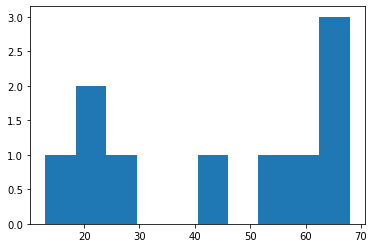

In [16]:
# plot simple histogram
plt.hist(x)

### <ins>Permutations<ins>


A permutation refers to an arrangement of elements. e.g. [3, 2, 1] is a permutation of [1, 2, 3] and vice-versa.

The NumPy Random module provides two methods for this: shuffle() and permutation().[[12]](https://www.w3schools.com/python/numpy/numpy_random_permutation.asp)

<br>

##### <ins>Function random.shuffle<ins>

Explaination:np.random.shuffle method randomly reorders the items of the entire set in place, that is original order is overwritten with the new sequence


Offical Documentation:https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.shuffle.html#numpy.random.RandomState.shuffle

In [27]:
list_1 = [1,2,3,4,5]

# in original order
print('Original Order:',list_1)

# in new order, overwriting the original
np.random.shuffle(list_1)
print('Shuffled:',list_1) 

Original Order: [1, 2, 3, 4, 5]
Shuffled: [1, 4, 2, 5, 3]



**<ins>Using shuffle with a multi dimensional array:<ins>**

When worrking with multi dimensional arrays shuffle only changes the order of the arrays, it does not change the order of the contents of the arrays.

In [49]:
# numpy.random.randn used to generate 5 arrays containing 4 rows and 3 columns of data each
shuf = np.random.randn(2, 4, 3)

# the arrays generated are displayed below
shuf


array([[[ 0.88813541,  0.79665273,  0.74604704],
        [ 0.61112773, -0.42199576,  0.19208445],
        [-1.31032244, -2.18789305, -0.97099459],
        [ 1.6474829 , -0.58370128,  1.07370947]],

       [[-0.34446004, -0.92335057,  0.72678535],
        [ 0.98173216, -0.75948068, -0.31409147],
        [ 2.0408062 , -0.45676857, -0.01849879],
        [ 0.04346557,  0.659337  ,  0.1901199 ]]])

In [50]:
# numpy.random.shuffle used to change the order of the arrays
np.random.shuffle(shuf)

# Notice how the contents of the arrays remain in the same order
shuf


array([[[-0.34446004, -0.92335057,  0.72678535],
        [ 0.98173216, -0.75948068, -0.31409147],
        [ 2.0408062 , -0.45676857, -0.01849879],
        [ 0.04346557,  0.659337  ,  0.1901199 ]],

       [[ 0.88813541,  0.79665273,  0.74604704],
        [ 0.61112773, -0.42199576,  0.19208445],
        [-1.31032244, -2.18789305, -0.97099459],
        [ 1.6474829 , -0.58370128,  1.07370947]]])

<br>

#### <ins>Function random.permutation<ins>

Explaination:Randomly permute a sequence, or return a permuted range.
    
np.random.permutation method returns a new array (copy of the original) of the objects from a list, randomly ordered. The output will contain all the objects from the original array, and will appear precisely in the same quantities as in the orignal set.
    
Offical Documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.permutation.html#numpy.random.RandomState.permutation

In [38]:
list_1 = [1,2,3,4,5] # list of objects
np.random.permutation(list_1) # the original list remains intact

array([1, 2, 5, 3, 4])


It is worth noting that np.random.permutation is built up on np.random.shuffle subroutine, which is used in the former source code. Extra functionality is provided on condition an array is parsed. Other wise, when an integer is parsed, it behaves as ordinary shuffle function.

<br>

# <ins>Distributions<ins>

For this part of the notebook I am going to look at 5 different distributions in the numpy package.

 - Uniform Distribution
 - Binomial Distribution
 - Poisson Distribution
 - Exponential Distribution

In [19]:
# Generate 10 random numbers berween 0 and 5 in uniform distribution 
np.random.uniform(0,5,10)

array([0.35458859, 0.9332022 , 4.75398263, 1.88631517, 2.66739234,
       0.34849482, 2.01176242, 4.13914006, 1.94917962, 3.67862046])

In [20]:
# Generate 1000 random numbers berween 0 and 1000 in uniform distribution
# And put into variable x
x = np.random.uniform(0,1000,10000)

(array([ 988.,  964.,  965.,  993.,  968., 1002.,  991., 1018., 1114.,
         997.]),
 array([1.86520167e-02, 1.00006354e+02, 1.99994055e+02, 2.99981757e+02,
        3.99969459e+02, 4.99957160e+02, 5.99944862e+02, 6.99932563e+02,
        7.99920265e+02, 8.99907967e+02, 9.99895668e+02]),
 <BarContainer object of 10 artists>)

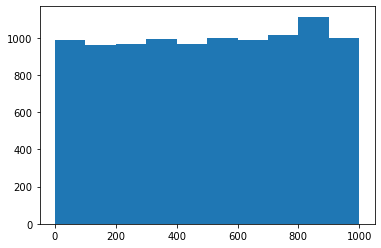

In [21]:
# Now plot x
plt.hist(x)

In [22]:
# Generate 1000 random numbers berween 10 and 1000 in uniform distribution
x = np.random.normal(10, 100, 1000)

(array([ 10.,  36.,  95., 195., 284., 211., 117.,  40.,  10.,   2.]),
 array([-299.38768301, -232.61014908, -165.83261515,  -99.05508122,
         -32.27754729,   34.49998664,  101.27752058,  168.05505451,
         234.83258844,  301.61012237,  368.3876563 ]),
 <BarContainer object of 10 artists>)

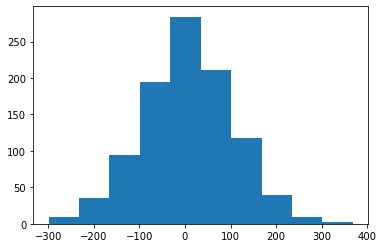

In [23]:
plt.hist(x)

### Uniform Distributions

[Offical Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform)

When looking through the differnt types of distrubutions I began to frighten myself again so I began with what looked like the easiest distribution to explain - The Uniform Distribution.

Uniform distribution is a probability distribution where each value within a certin range is equally likly to occur and values outside the range never occur[[8]](https://www.youtube.com/watch?v=uial-2girHQ)

Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high). In other words, any value within the given interval is equally likely to be drawn by uniform.[[9]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform)

In [24]:
#Remove hashtag from line below and run cell for help from python on uniform distributions
# help(np.random.uniform)

In [25]:
# Generating Random Uniform Data - floating numbers between 1 and 10
x = np.random.uniform(1,10,size = (5,3,2))
print(x)

[[[3.1617028  4.61721415]
  [3.87306722 6.04061694]
  [5.23071738 9.44933824]]

 [[3.03475258 5.9490162 ]
  [5.84736318 7.89940427]
  [2.44406436 7.61322099]]

 [[3.63903499 6.66353639]
  [3.33534165 7.91340356]
  [1.77678322 3.43102696]]

 [[3.16683729 6.09289463]
  [4.99955024 9.57841363]
  [3.21869414 3.41392545]]

 [[1.07088872 8.86916559]
  [8.51268317 5.16385515]
  [4.43320223 5.00552748]]]


You can use this to generate datasets of all sizes with random numbers and these can then be broken down into smaller arrays, depending on how you have reqested the uniform function to display the data - you can play with the figures after size to see what I mean here
```
x = np.random.uniform(1,10,size = (5,3,2))
print(x)
```
For example the above will generate 1 multi-dimensional large array with all the data (Floating numbers beteween 1-10, 5 smaller arrays each containing 3 arrays with 2 values in each. This is very easily manipulated and someone could quickly generate a sample numerial data set using real world parameters and run test cases on that data - this can be used in a varity of ways from statistical sampling, medical testing, computer simulation and even gambling. 

Visualising the data also fairly easy - if every number is equally likly to be generated, then the distrbuition should be flat - as seen below.

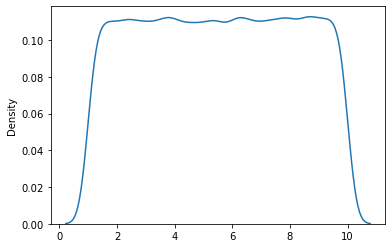

In [26]:
# Visualising Random Data (100000 numbers between 1 and 10)

# A kernel density estimate (KDE) plot is a method for visualizing the distribution
#of observations in a dataset, analagous to a histogram. KDE represents the data using 
#a continuous probability density curve in one or more dimensions.
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(r.uniform(1,10, size=100000))
plt.show()

As you can see from the plot above the distribution of the generated numbers is pretty evenly spread out over the parameters I have passed it, similar quantity of 1s 2s 3s and so on. However be careful - the less numbers you have and the wider the distribution values the more uneven the "Uniform" data may become. The bigger number of values you look for the more even the plot will become.

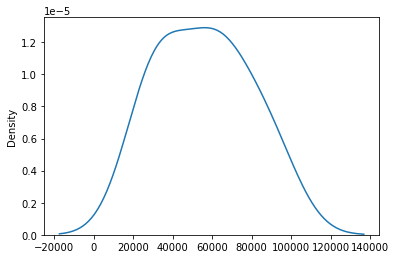

In [27]:
sns.kdeplot(r.uniform(1,100000, size=10))
plt.show()

The Code above is not a good example of uniform distribution as the varience is too wide (between 1 and 100000) and only looking for 10 values - if all are as likely to come up as another this means that you may come back with distintly different looking plots every time you run it!! So better to spot check the data structure behind the plot before deciding to use the uniform distribution for your number generation needs.

### BINOMIAL DISTRBUTION 
 Binomial distribution is the outcome of binary scenarios, for example the toss of a coin. It is a probability distribution that summarises the likelihood that a variable will take one of two independent values under a given set of parameters.The distribution is obtained by performing a number of Bernoulli trials. [[6]](https://www.geeksforgeeks.org/python-binomial-distribution/). It can be thought of as the pobability of a success or failure outcome in an experiment or survey that is repeated multiple times. 
 There are a number of criteria that need to be met for the Binomial distribution to work
 - There must be only 2 possible outcomes.(Success or Failure)
 - Each outcome has a fixed probability of occurring. A success has the probability of p, and a failure has the probability of 1 – p.
 - Each trial is completely independent of all others and probability of success is exactly the same in each event.
 
 The binomial random variable represents the number of successes(r) in n successive independent trials of a Bernoulli experiment[[7]](https://www.geeksforgeeks.org/python-binomial-distribution/)
 
 The binomial distribution formula is:
 
![](probability-distributions0x.png)  
  
 x = total number of "successess"  
 P = probability of a success in an individual trial  
 n = number of trials
 
 size  = The shape of the returned array
 
   

 
 


 

<br>

**What is a Binomial Distribution? Real Life Examples:**

"Many instances of binomial distributions can be found in real life. For example, if a new drug is introduced to cure a disease, it either cures the disease (it’s successful) or it doesn’t cure the disease (it’s a failure). If you purchase a lottery ticket, you’re either going to win money, or you aren’t. Basically, anything you can think of that can only be a success or a failure can be represented by a binomial distribution."

Quote taken from: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/
 
 Binomial Distribution can also be defined as Discrete Distribution - for example a coin toss is discrete as the results can only be heads or tails - however if you were taking the speed of cars on a motorway it could be differnt every time - 80kmph, 82kmph, 85kmph, 78kmph ..... and so on.

In [51]:
# This can represent tossing a coin
# number of trials 10
# probability is .5
#shape of array 10

x = r.binomial(n=10, p=0.5, size = 10)
print(x)

[7 4 4 8 4 7 5 8 6 6]


##### Visualisation of Binomial Distribution

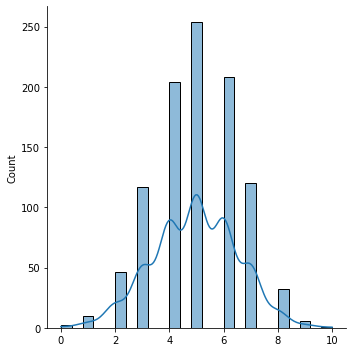

In [29]:
# Probability is 50%
sns.displot(r.binomial(n=10, p=0.5, size = 1000), kde=True)


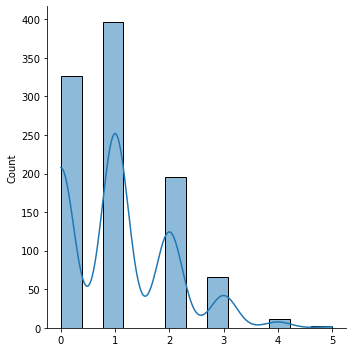

In [30]:
# Probability is 10%
sns.displot(r.binomial(n=10, p=0.1, size = 1000), kde=True)

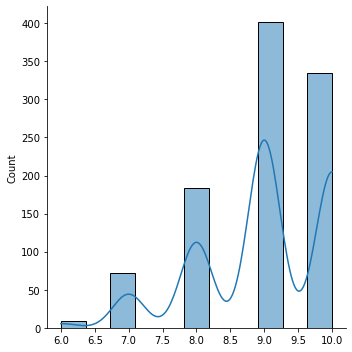

In [31]:
# Probability is 90%
sns.displot(r.binomial(n=10, p=0.9, size = 1000),kde=True)

##### Binomal vs normal  
The difference between normal and binomial distribution is that normal is contineous where as binomial is discrete. However if there are enough data points the plots can be very similar depending on location and scale.

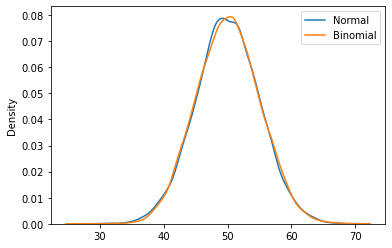

In [32]:
#Normal distribution
sns.kdeplot(r.normal(loc = 50, scale = 5, size = 10000), label = 'Normal')
#Binomial distribution
sns.kdeplot(r.binomial(n = 100, p = 0.5, size = 10000), label = 'Binomial')
plt.legend()

<br>

# The Poisson Distribution 

https://www.youtube.com/watch?v=cPOChr_kuQs

The Poission Distribution is a discrete distribution - similar to the binomial distribution, which is one in which the data can only take on certain values, for example integers.  
It describes the number of events occuring in a fixed time interval or "region of oppertunity".  
Simple example is how many customers did a shop have in a given hour.  
An interesting thing about the the Poisson Distribution is it requires only one paramaeter - The expected number of events during the time interval - lambda.   



**LAMBDA SYMBOL**  
![](lambda.PNG) 

The Possion Distribution is bounded by 0 to Infinity

### Assumptions of the Poisson Distribution

 - The Rate at which events occur is constant. (ie. The pobability of an event occuring in a certain time interval should be exactly the same for every other time interval of that same length.)
 - The occurence of one event should not affect the occurence of a subsequent event (ie. Each trial is completely independent of all others and probability of success is exactly the same in each event.)  

These assumptions are difficult to hold in reality. As even if we use simple example I gave above of customers in a shop in a given hour, the paramateters around one hour will not match the next. Maybe the shop gets busier a lunch time, or it is buiser on Fridays because there is an event close by that increases customer footfall, or you sell a product that is seasonal so you are buiser at certain times of the year - the possible influences are endless!! 

### Probability Mass Function (PMF)
This is the probability of getting each of the discrete outcome.  

![](PMF.PNG)  

This is how this would look if:  
lambda = 3 (expected number of events)**(NB - There is no requirement for lambda to be a whole number)**  
What is the probability of 5 events  

![](PMFE.PNG) 

##### Poisson distribution in Numpy


https://www.youtube.com/watch?v=dGhDzCJryGA

In [33]:
# Call the poisson random distribution with lambda is 5 with 3 draws
np.random.poisson(5,3)

array([4, 3, 5])

In [53]:
# using the unbiased varience (ddof)
# If the averge number of events in a given time period is 1
# if you draw that a million times you will get very close to 1
np.var(np.random.poisson(1,1000000),ddof = 1)

0.9984379678129672

##### Visualisation of Poisson distribution

See example below where if you draw a million samples where lambda is 1 the overwhelming majority of events will be between 0 and 2 and will steeply drop off the further right you go on the x axis.

(array([3.68434e+05, 3.67028e+05, 1.83803e+05, 6.17620e+04, 0.00000e+00,
        1.52420e+04, 3.12300e+03, 5.21000e+02, 7.70000e+01, 1.00000e+01]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

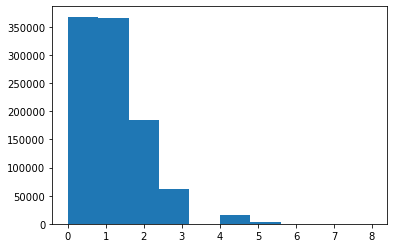

In [35]:
plt.hist(np.random.poisson(1,1000000))

##### Normal Distribution vs Poisson Distribution

Normal distribution is continous whereas poisson is discrete.  
But we can see that similar to binomial for a large enough poisson distribution it will become similar to normal distribution with certain std dev and mean.[[9]](https://www.w3schools.com/python/numpy/numpy_random_poisson.asp)

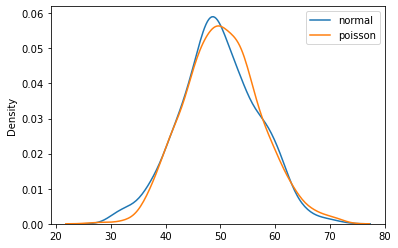

In [36]:
# Normal distribution
sns.kdeplot(r.normal(loc=50, scale=7, size=1000), label='normal')
# Poisson distribution
sns.kdeplot(r.poisson(lam=50, size=1000), label='poisson')
plt.legend()
plt.show()

##### Poisson Distribution vs Binomial Distribution


The difference is very subtle, it is that, binomial distribution is for discrete trials, whereas poisson distribution is for continuous trials.

But for very large n and near-zero p binomial distribution is near identical to poisson distribution such that n * p is nearly equal to lam.[[10]](https://www.w3schools.com/python/numpy/numpy_random_poisson.asp)

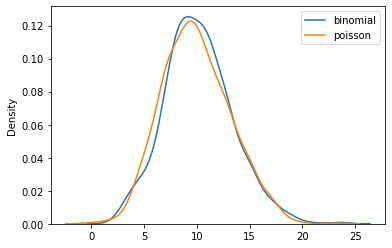

In [37]:
sns.kdeplot(r.binomial(n=1000, p=0.01, size=1000), label='binomial')
sns.kdeplot(r.poisson(lam=10, size=1000), label='poisson')
plt.legend()
plt.show()

<br>

### **Exponential distribution**  
numpy.random.exponential function draws results from exponential distribution.

This is one of the "nicer" distributions I chose as the name is self explanetory and it is one of the easier distributions to be able to visualise in your minds eye.

This type of distribution is typically used to describe situations where an object with a constant probability can change its state from one to another in a given unit of time. In other words, if independent events are to occur per unit of time, the exponential distribution describes the time intervals between successive events. There is many application of the distriution in the real situations, for example, the amount of time (beginning now) until an meteor hits the earth has an exponential distribution - and is a little morbid. 

The NumPy function takes two parameters, the first one being the scale, which relates to the time period, and the other one - size, which is a number of experiments (by default, size = 10).

Exponential distribution is a special case of gamma distribution, and is related to Poisson distribution (which is used to describe low-probability events).  

Offical Documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.exponential.html#numpy.random.RandomState.exponential


Below is an example of the distribution and the visual representation.

<function matplotlib.pyplot.show(close=None, block=None)>

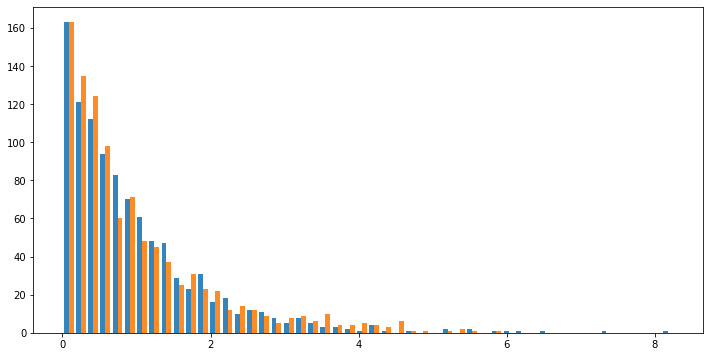

In [67]:
# Size of the plot (width, height)
plt.figure(figsize=(12,6))

# The first parameter (scale) relates to time period, the second one (size) - to number of experiments (2 sets of 1000 experiments)
expon = np.random.exponential(1, [1000,2]) 

# The values in bins are grouped by sets of experiment, each in represented by different colour
plt.hist(expon, bins=50, alpha=0.9, rwidth=0.8) 

#Show Plot
plt.show


Similarly to normal distribution above, in the below plot, the same histogram is overlayed with the normal probability density function (pdf), for comparison. Again, for the histogram to fit, it must be re-scaled so that the y-axis correspondes to the probability of occurance rather than counter of occurances.

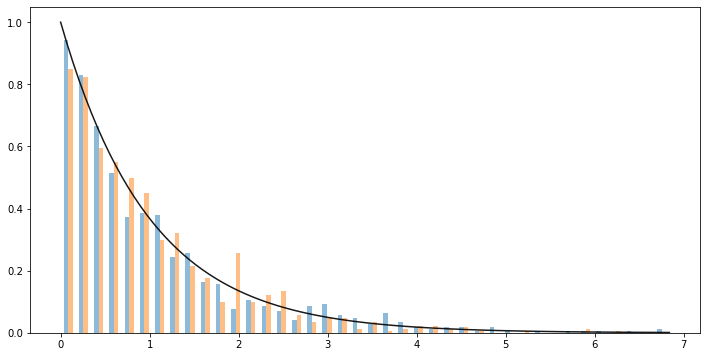

In [62]:
# adapted from https://stackoverflow.com/a/47324702

# exponential funtion
def dist_func(x, a):
    return(a*np.exp(-a*x))

fig = plt.figure(figsize=(12, 6)) # size of the plot (width, height)
ax = fig.add_subplot(1, 1, 1 )

# histogram takes data from the value generated in the above Notebook cell
ax.hist(expon, bins=40, alpha=0.5, rwidth=0.6, density=True) # the same format as above

# ideal exponential pdf curve, for comparison
max_e = np.max(expon) # the largest of the generated values
ax.plot(np.linspace(0, max_e, 100), dist_func(np.linspace(0, max_e, 100), 1), 'k', alpha=0.9) # 
plt.show()

<br>


### **Hypergeometric Distribution**

The hypergeometric distribution is a discrete probability distribution. It is used when you want to determine the probability of obtaining a certain number of successes without replacement from a specific sample size. This is similar to the binomial distribution, but this time you are not given the probability of a single success. Some example situations to apply this distribution are:


 - The probability of getting 3 spades in a 5 card hand in poker.
 - The probability of drawing 60% males for the first year class from a mixed-gender group randomly selected in a school admissions lottery.
 
 https://towardsdatascience.com/hypergeometric-distribution-explained-with-python-2c80bc613bf4
 
 
Parameters (information) required for hypergeometric computations:

To compute the probability mass function (aka a single instance) of a hypergeometric distribution, we need:
 - The total number of items we are drawing from (called N).
 -  The total number of desired items in N (called A).
 - The number of draws from N we will make (called n).
 - The number of desired items in our draw of n items (called x).  
 
**NB** There are different letters used for these variables depending on the tutorial.
 
 
 
 **Probability Mass Function (PMF) for hypergeometric distribution**  
 ![](hypergeodis.png)